In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [97]:
df = pd.read_pickle("GPA 2145-16 Compound Properties Table - English.pkl")
df = df.dropna(subset=['Gross Heating Value Ideal Gas [Btu/ft^3]']).reset_index()

cols = ['Compound', 'CAS', 'Formula', 'Gross Heating Value Ideal Gas [Btu/ft^3]', 'Molar Mass [g/mol]', 
        'Gross Heating Value Ideal Gas [Btu/lbm]',
        'Ideal Gas Relative Density @60F:1atm',
       'Liq. Relative Density @60F:1atm', 'API Gravity @60F:1atm']
df = df[cols]

In [98]:
# Defining BTEX compounds
btex_substrings = ['xylene', 'benzene', 'toluene'] 
aromatic_substrings = ['styrene', 'naphthalene']

df['Is BTEX'] = df['Compound'].str.contains('|'.join(btex_substrings), case=False, na=False)
df['Is Aromatic'] = df['Compound'].str.contains('|'.join(aromatic_substrings), case=False, na=False)

# Creating the "Is Hydrocarbon" column
df['Is Hydrocarbon'] = df['Formula'].apply(lambda x: 'C' in x and 'H' in x)
df['Is Hydroxyl'] = df['Formula'].apply(lambda x: 'H' in x and 'O' in x)

# Labeling for displaying texts
labels = ['methane', 'propane', 'n-pentane', 'n-heptane', 'n-octane', 'n-decane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'styrene', 'naphthalene',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene']
df['Display Text'] = df['Compound'].isin(labels)
df

,Compound,CAS,Formula,Gross Heating Value Ideal Gas [Btu/ft^3],Molar Mass [g/mol],Gross Heating Value Ideal Gas [Btu/lbm],Ideal Gas Relative Density @60F:1atm,Liq. Relative Density @60F:1atm,API Gravity @60F:1atm,Is BTEX,Is Aromatic,Is Hydrocarbon,Is Hydroxyl,Display Text
0,methane,74-82-8,CH4,1010.00,16.0425,23892.0,0.55390,0.300000,340.0000,False,False,True,False,True
1,ethane,74-84-0,C2H6,1769.70,30.0690,22334.0,1.03820,0.356280,265.6600,False,False,True,False,False
2,propane,74-98-6,C3H8,2516.10,44.0956,21654.0,1.52250,0.507190,147.4900,False,False,True,False,True
3,isobutane,75-28-5,C4H10,3251.90,58.1222,21232.0,2.00680,0.562830,119.9100,False,False,True,False,False
4,n-butane,106-97-8,C4H10,3262.30,58.1222,21300.0,2.00680,0.584200,110.7100,False,False,True,False,False
5,isopentane,78-78-4,C5H12,4000.90,72.1488,21044.0,2.49110,0.625140,94.8480,False,False,True,False,False
6,n-pentane,109-66-0,C5H12,4008.70,72.1488,21085.0,2.49110,0.630710,92.8500,False,False,True,False,True
7,n-hexane,110-54-3,C6H14,4755.90,86.1754,20943.0,2.97540,0.664060,81.5820,False,False,True,False,False
8,n-heptane,142-82-5,C7H16,5502.60,100.2019,20839.0,3.45970,0.688230,74.1010,False,False,True,False,True
9,n-octane,111-65-9,C8H18,6249.00,114.2285,20760.0,3.94400,0.706550,68.7680,False,False,True,False,True


In [99]:
BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffin_idx = list(set(df.index) - set(BTEX_idx) - set(aromatic_idx) - set(non_HC_idx) - set(hydroxyl_idx))
whole_idx = list(df.index)

df['Is Paraffin'] = False
df['Is Paraffin'].loc[paraffin_idx] = True

C:\Users\EricKim\AppData\Local\Temp\ipykernel_26516\4218476158.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is Paraffin'].loc[paraffin_idx] = True


In [100]:
x = df['Molar Mass [g/mol]']
#x = df['Ideal Gas Relative Density @60F:1atm']
#x = df['API Gravity @60F:1atm']
#x = df['Gross Heating Value Ideal Gas [Btu/ft^3]']
#x = df['Liq. Relative Density @60F:1atm']
#x = df['API Gravity @60F:1atm']
#x = df['Gross Heating Value Ideal Gas [Btu/lbm]']

#y = df['Molar Mass [g/mol]']
#y = df['Ideal Gas Relative Density @60F:1atm']
#y = df['API Gravity @60F:1atm']
y = df['Gross Heating Value Ideal Gas [Btu/ft^3]']
#y = df['Liq. Relative Density @60F:1atm']
#y = df['API Gravity @60F:1atm']
#y = df['Gross Heating Value Ideal Gas [Btu/lbm]']


#y = df['Gross Heating Value Ideal Gas [Btu/ft^3]'] * (379.5 / y)

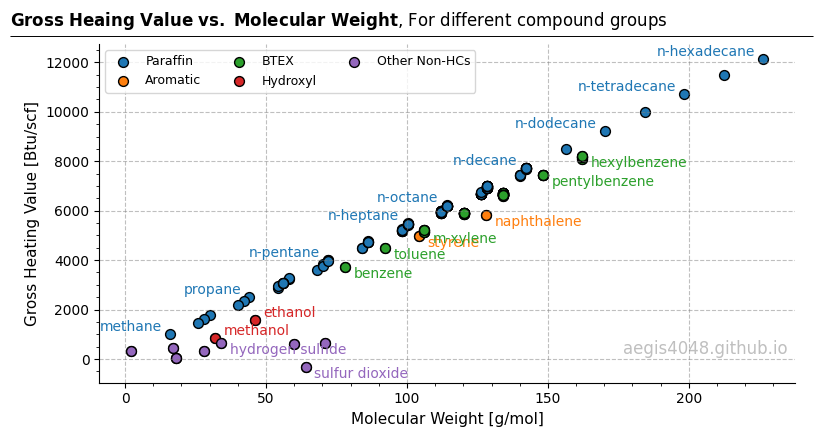

In [102]:
fig, ax = plt.subplots(figsize=(8, 4.5))

alpha = 1
ax.scatter(x, y, s=50, edgecolor='k', alpha=alpha, label='Paraffin')
ax.scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=alpha, label='Aromatic')
ax.scatter(x.loc[BTEX_idx], y.loc[BTEX_idx], s=50, edgecolor='k', alpha=alpha, label='BTEX')
ax.scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha, label='Hydroxyl')
ax.scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha, label='Other Non-HCs')

ax.legend(fontsize=9, ncol=3)

#selected_idx = excluded_idx
selected_idx = random.sample(whole_idx, k=int(len(whole_idx) * 0.1)) 
texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = '#9467bd'
        ha = 'left'
        va = 'top'
        if df['Is Paraffin'].loc[i]: 
            c = '#1f77b4'
            ha ='right'
            va = 'bottom'
        if df['Is BTEX'].loc[i]:
            c = '#2ca02c'
            ha ='left'
            va = 'top'
        if df['Is Hydroxyl'].loc[i]:
            c = '#d62728'
            va = 'bottom'
            ha = 'left'
        if df['Is Aromatic'].loc[i]:
            c = '#ff7f0e'
            va = 'top'
            ha = 'left'
        
        if ha == 'left':
            icr = 3
        else:
            icr= -3
        
        ax.annotate(txt, (x.loc[i] + icr, y.iloc[i]), fontsize=10, c=c, ha=ha, va=va)

ax.minorticks_on()
ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
#ax.grid(axis='y', which='minor', linestyle='--', color='grey', alpha=0.2)
#ax.grid(axis='x', which='minor', color='grey', linestyle='--', alpha=0.2)
ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Molecular Weight [g/mol]', fontsize=11)
ax.set_ylabel('Gross Heating Value [Btu/scf]', fontsize=11)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=12, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

#ax.set_xlim(0, 1)
#ax.set_ylim(10000, 30000)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heaing Value vs. Molecular Weight')
plain_txt = r', For different compound groups'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()

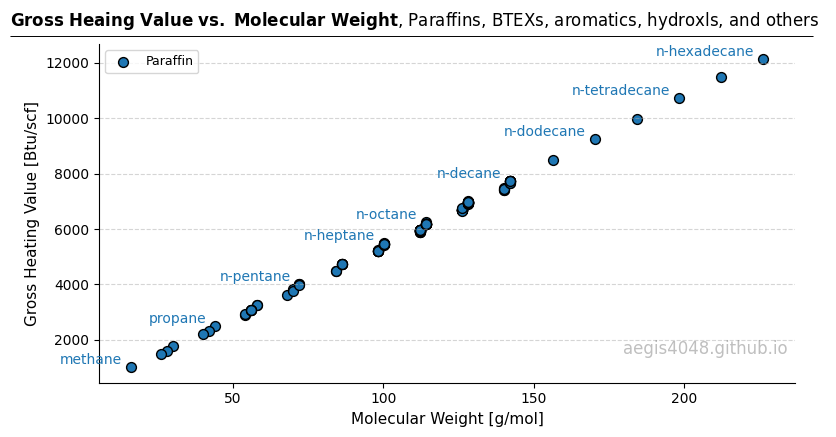

In [103]:
fig, ax = plt.subplots(figsize=(8, 4.5))

alpha = 1
ax.scatter(x.loc[paraffin_idx], y.loc[paraffin_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffin')

ax.legend(fontsize=9, ncol=3)

#selected_idx = excluded_idx
selected_idx = random.sample(whole_idx, k=int(len(whole_idx) * 0.1)) 
texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = '#9467bd'
        ha = 'left'
        va = 'top'
        if df['Is Paraffin'].loc[i]: 
            c = '#1f77b4'
            ha ='right'
            va = 'bottom'
            ax.annotate(txt, (x.loc[i] + icr, y.iloc[i]), fontsize=10, c=c, ha=ha, va=va)

ax.grid(axis='y', linestyle='--', color='#acacac', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Molecular Weight [g/mol]', fontsize=11)
ax.set_ylabel('Gross Heating Value [Btu/scf]', fontsize=11)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=12, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heaing Value vs. Molecular Weight')
plain_txt = r', Paraffins, BTEXs, aromatics, hydroxls, and others'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()

In [108]:
x1, y1 = x.loc[paraffin_idx].values, y.loc[paraffin_idx].values
x1 = x1.reshape(-1, 1)

In [109]:
from sklearn import linear_model

ols = linear_model.LinearRegression().fit(x1, y1)
y_pred_ols = ols.predict(x1)
coefs_ols = ols.coef_
intercept_ols = ols.intercept_

In [111]:
ols = linear_model.LinearRegression().fit(x1, y1)
y_pred_ols = ols.predict(x1)
coefs_ols = ols.coef_
intercept_ols = ols.intercept_

In [113]:
coefs_ols

array([53.21521938])

In [114]:
intercept_ols

69.92314480505775

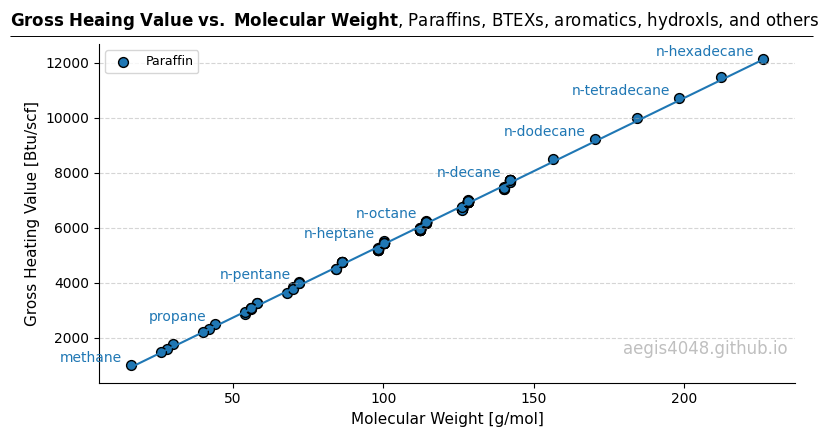

In [112]:
fig, ax = plt.subplots(figsize=(8, 4.5))

alpha = 1
ax.scatter(x.loc[paraffin_idx], y.loc[paraffin_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffin')
ax.plot(x1, y_pred_ols)

ax.legend(fontsize=9, ncol=3)

#selected_idx = excluded_idx
selected_idx = random.sample(whole_idx, k=int(len(whole_idx) * 0.1)) 
texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = '#9467bd'
        ha = 'left'
        va = 'top'
        if df['Is Paraffin'].loc[i]: 
            c = '#1f77b4'
            ha ='right'
            va = 'bottom'
            ax.annotate(txt, (x.loc[i] + icr, y.iloc[i]), fontsize=10, c=c, ha=ha, va=va)

ax.grid(axis='y', linestyle='--', color='#acacac', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Molecular Weight [g/mol]', fontsize=11)
ax.set_ylabel('Gross Heating Value [Btu/scf]', fontsize=11)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=12, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heaing Value vs. Molecular Weight')
plain_txt = r', Paraffins, BTEXs, aromatics, hydroxls, and others'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()

# Get an idea of what a common BTEX ratio is

Page 208 of API Techbook as I, sg, viscosity, and 